# Load data

## Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
import sys
import warnings

sys.path.append(os.path.abspath('..'))
warnings.filterwarnings("ignore")

In [3]:
from src.utils import load_df, save_df
from src.visualization import plot_target_distribution, plot_correlation_heatmap, plot_missing_data
from src.preprocessing import handle_missing_and_encode
from src.modeling import hybrid_feature_selection
from src.transformation import create_FS_data

## Load data

In [5]:
house_df = load_df("train-house-prices-advanced-regression-techniques.csv")
house_df.head()

Loaded: d:\Code\Code\Python\aio2025\Module5\project\New Project 5\data\train-house-prices-advanced-regression-techniques.csv


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# EDA

## Explore all features

In [6]:
print("Shape:", house_df.shape)
print("Duplicates:", house_df.duplicated().sum())

Shape: (1460, 81)
Duplicates: 0


In [7]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
# Check categorical feature
object_cols = house_df.select_dtypes(include=['object']).columns
print(len(object_cols))
house_df[object_cols].nunique()


43


MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [10]:
# Numeric feature
numeric_cols = house_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
len(numeric_cols)

38

In [11]:
# Missing data
missing = house_df.isnull().sum().sort_values(ascending=False)
missing = missing[missing > 0]
missing_perc = (missing / len(house_df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Missing %': missing_perc})
print(missing_df)

              Missing Count  Missing %
PoolQC                 1453  99.520548
MiscFeature            1406  96.301370
Alley                  1369  93.767123
Fence                  1179  80.753425
MasVnrType              872  59.726027
FireplaceQu             690  47.260274
LotFrontage             259  17.739726
GarageQual               81   5.547945
GarageFinish             81   5.547945
GarageType               81   5.547945
GarageYrBlt              81   5.547945
GarageCond               81   5.547945
BsmtFinType2             38   2.602740
BsmtExposure             38   2.602740
BsmtCond                 37   2.534247
BsmtQual                 37   2.534247
BsmtFinType1             37   2.534247
MasVnrArea                8   0.547945
Electrical                1   0.068493


## Target feature

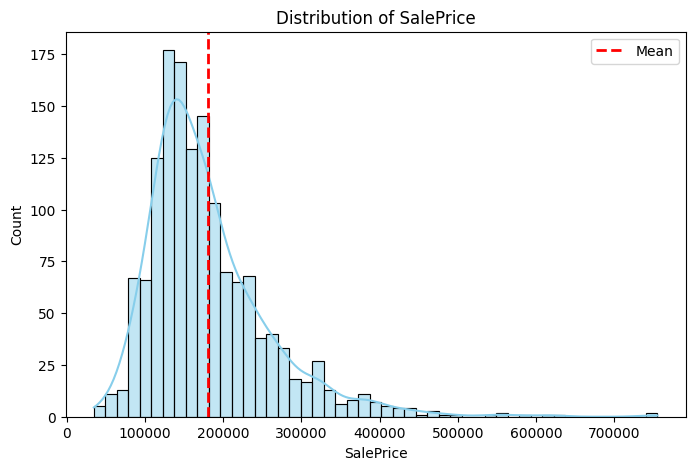

In [12]:
plot_target_distribution(house_df)

Text(0.5, 1.0, 'Sales')

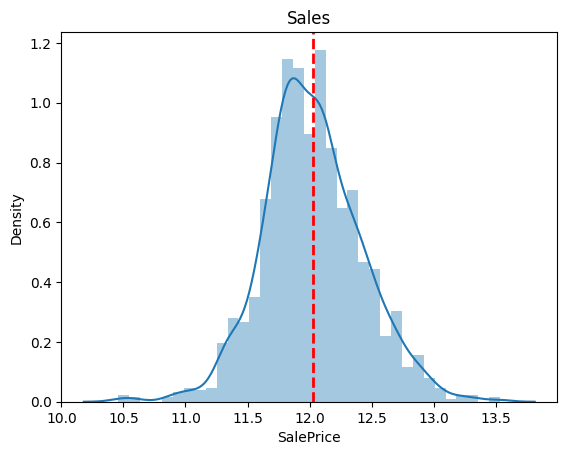

In [13]:
# Log transformation
sns.distplot(np.log(house_df["SalePrice"]))
plt.axvline(x=np.log(house_df["SalePrice"]).mean(), linestyle="--", linewidth=2, color='red')
plt.title("Sales")

In [14]:
# Correlation with target feature
house_df[numeric_cols].corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

## Detect skewness

In [15]:
# target feature
print(house_df["SalePrice"].skew())

1.8828757597682129


In [16]:
# log transformation of target feature
print((np.log1p(house_df["SalePrice"])).skew())

0.12134661989685333


In [17]:
for col in numeric_cols:
  if house_df[col].skew() > 2:
    print(f"Col {col} | Skewness: {house_df[col].skew()}")

Col LotFrontage | Skewness: 2.163569142324884
Col LotArea | Skewness: 12.207687851233496
Col MasVnrArea | Skewness: 2.669084210182863
Col BsmtFinSF2 | Skewness: 4.255261108933303
Col LowQualFinSF | Skewness: 9.011341288465387
Col BsmtHalfBath | Skewness: 4.103402697955168
Col KitchenAbvGr | Skewness: 4.488396777072859
Col OpenPorchSF | Skewness: 2.3643417403694404
Col EnclosedPorch | Skewness: 3.08987190371177
Col 3SsnPorch | Skewness: 10.304342032693112
Col ScreenPorch | Skewness: 4.122213743143115
Col PoolArea | Skewness: 14.828373640750588
Col MiscVal | Skewness: 24.476794188821916


## Detect multicollinearity

In [18]:
X_num = house_df.select_dtypes(include=['int64', 'float64']).drop(columns=['SalePrice', 'Id'])
X_num = X_num.fillna(X_num.mean())

### Correlation Matrix

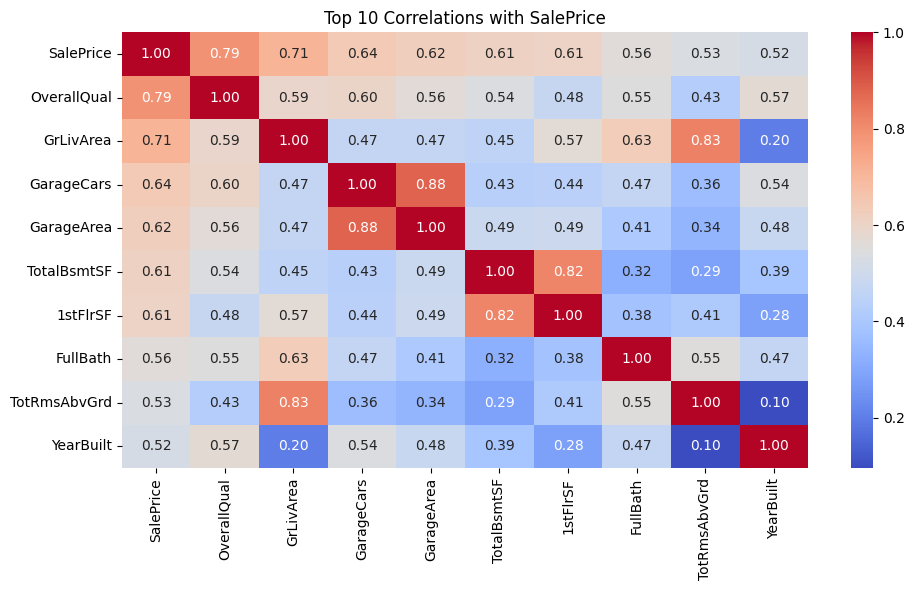

In [19]:
plot_correlation_heatmap(house_df, top_n=10)

### VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X_num.columns
vif_data["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(len(X_num.columns))]
print(vif_data.sort_values(by="VIF", ascending=False).head(10))

         Feature           VIF
8     BsmtFinSF1           inf
9     BsmtFinSF2           inf
10     BsmtUnfSF           inf
11   TotalBsmtSF           inf
15     GrLivArea           inf
14  LowQualFinSF           inf
13      2ndFlrSF           inf
12      1stFlrSF           inf
35        YrSold  2.411126e+04
24   GarageYrBlt  2.290578e+04


### MI

In [ ]:
from sklearn.feature_selection import mutual_info_regression

y = house_df["SalePrice"]

mi = mutual_info_regression(X_num, y)
mi_df = pd.DataFrame({
    "Feature": X_num.columns,
    "MI_Score": mi
})
mi_df = mi_df.sort_values(by="MI_Score", ascending=False).reset_index(drop=True)
print(mi_df.head(10))


       Feature  MI_Score
0  OverallQual  0.562764
1    GrLivArea  0.483217
2    YearBuilt  0.367590
3  TotalBsmtSF  0.366366
4   GarageArea  0.364472
5   GarageCars  0.360555
6     1stFlrSF  0.310100
7  GarageYrBlt  0.289572
8   MSSubClass  0.273448
9     FullBath  0.260504


# Drop missing columns

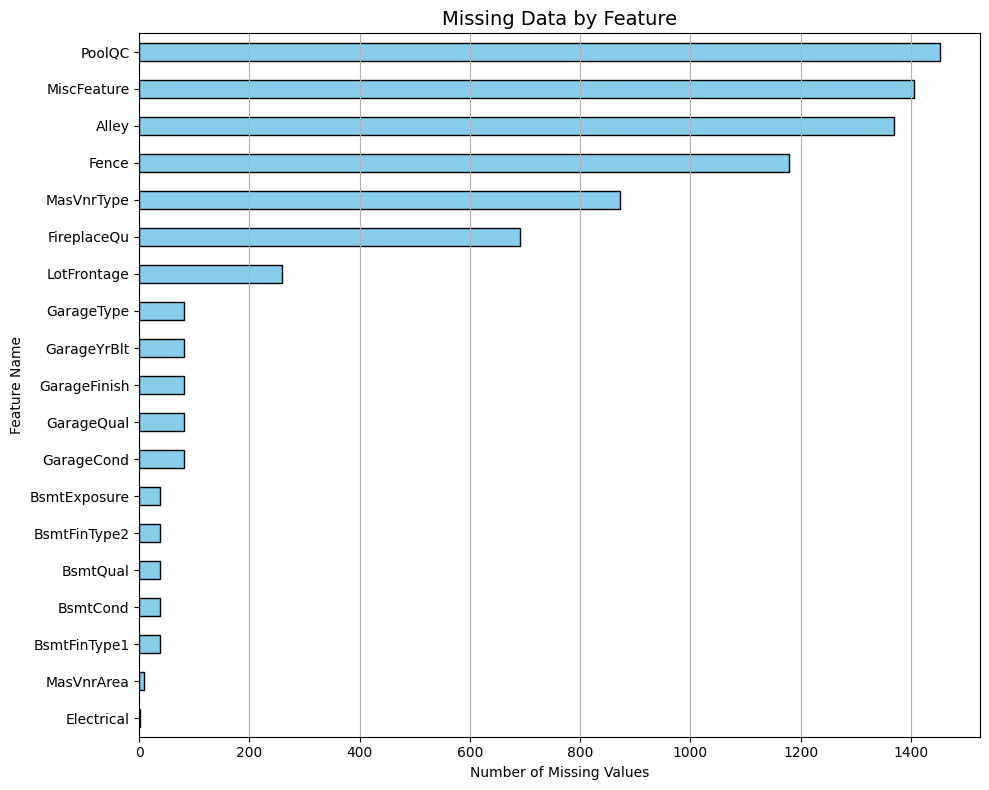

In [20]:
plot_missing_data(house_df)

In [21]:
missing_percent = house_df.isnull().mean() * 100
removed_cols = missing_percent[missing_percent > 50].index.tolist()
removed_cols.append("Id")

# droping values more than 50%
raw_data = house_df.drop(removed_cols, axis=1)

# Feature Engineering

## Mapping

- `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1/2`: NA điền bằng "NoBasement"

- `HeatingQC`, `KitchenQual`, `FireplaceQu`, `GarageQual`, `GarageCond`, `ExterQual`, `ExterCond`: encode Ordinal

In [22]:
raw_data = handle_missing_and_encode(raw_data)

In [ ]:
save_df(raw_data, "raw_data.csv", "data")

## Feature Engineering

In [24]:
FE_house_df = raw_data.copy()

# AREA
FE_house_df['TotalPorchSF'] = FE_house_df[['OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].sum(axis=1)
FE_house_df['TotalArea'] = FE_house_df[['GrLivArea', 'TotalBsmtSF','GarageArea']].sum(axis=1)
FE_house_df['LivingToLotRatio'] = FE_house_df['GrLivArea'] / FE_house_df['LotArea']
FE_house_df['TotalFinSF'] = FE_house_df[['BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF']].sum(axis=1)

# AGE FEATURES
FE_house_df['RemodAge'] = (FE_house_df['YrSold'] - FE_house_df['YearRemodAdd']).clip(lower=0) # để transformation được
FE_house_df['GarageAge'] = FE_house_df['YrSold'] - FE_house_df['GarageYrBlt']

## IS NEW HOUSE
FE_house_df['IsNew'] = (FE_house_df['YearBuilt'] == FE_house_df['YrSold']).astype(int)
FE_house_df['IsRemodeled'] = (FE_house_df['YearRemodAdd'] != FE_house_df['YearBuilt']).astype(int)

## QUALITY & CONDITION FEATURES
FE_house_df['OverallScore'] = FE_house_df['OverallQual'] * 0.7 + FE_house_df['OverallCond'] * 0.3
FE_house_df['HasFireplace'] = (FE_house_df['Fireplaces'] > 0).astype(int)
FE_house_df['HasPool'] = (FE_house_df['PoolArea'] > 0).astype(int)
FE_house_df['HasGarage'] = (FE_house_df['GarageArea'] > 0).astype(int)
FE_house_df['HasBsmt'] = (FE_house_df['TotalBsmtSF'] > 0).astype(int)
FE_house_df['Has2ndFloor'] = (FE_house_df['2ndFlrSF'] > 0).astype(int)
FE_house_df['IsPaved'] = (FE_house_df['Street'] == 'Pave').astype(int)


FE_house_df = FE_house_df.drop(['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'Street',
                                'GrLivArea', 'TotalBsmtSF','GarageArea',
                                'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch',
                                'BsmtFinSF1', 'BsmtFinSF2', '1stFlrSF', '2ndFlrSF',
                                'Fireplaces', 'PoolArea', 'OverallQual', 'OverallCond'
                                ], axis=1)

In [ ]:
save_df(FE_house_df, "FE_data.csv", "data")

## Check multicollinearity after FE

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

FE_X_num = FE_house_df.select_dtypes(include=['int64', 'float64'])
FE_X_num = FE_X_num.fillna(FE_X_num.mean())

FE_vif_data = pd.DataFrame()
FE_vif_data["Feature"] = FE_X_num.columns
FE_vif_data["VIF"] = [variance_inflation_factor(FE_X_num.values, i) for i in range(len(FE_X_num.columns))]
print(FE_vif_data.sort_values(by="VIF", ascending=False).head(10))

         Feature          VIF
29     TotalArea  1306.588174
31    TotalFinSF   692.038708
23    GarageCond   268.584393
39     HasGarage   268.457117
22    GarageQual   261.346499
40       HasBsmt   207.469995
42       IsPaved   159.792866
7       BsmtCond   125.231442
36  OverallScore   115.580544
4      ExterQual   109.558916


**NOTE**: sau FE, đã không còn cột có `VIF = inf`

# Feature Selection

In [26]:
X = raw_data.drop(columns=['SalePrice'])
y = raw_data['SalePrice']

stable_features, feature_count = hybrid_feature_selection(X, y, top_k=30)

stable_df = pd.DataFrame({
    "Feature": feature_count.keys(),
    "Count": feature_count.values()
}).sort_values("Count", ascending=False)


Stable features (≥3/5 methods): 29
Top 10: ['1stFlrSF', '2ndFlrSF', 'BsmtExposure', 'BsmtFinSF1', 'BsmtQual', 'ExterQual', 'Exterior1st_target_encoded', 'Exterior2nd_target_encoded', 'FireplaceQu', 'GarageArea']


In [ ]:
save_df(stable_df, "hybrid_fs_feature_count.csv")

In [ ]:
raw_FS_data = create_FS_data(raw_data, stable_features)
save_df(raw_FS_data, "raw_FS_data.csv", "data")

## FE Data

In [33]:
X_FE = FE_house_df.drop(columns=['SalePrice'])
y = FE_house_df['SalePrice']

FE_stable_features, FE_feature_count = hybrid_feature_selection(X_FE, y, top_k=30)

FE_stable_df = pd.DataFrame({
    "Feature": FE_feature_count.keys(),
    "Count": FE_feature_count.values()
}).sort_values("Count", ascending=False)


Stable features (≥3/5 methods): 27
Top 10: ['BsmtExposure', 'BsmtQual', 'Exterior1st_target_encoded', 'Exterior2nd_target_encoded', 'FireplaceQu', 'Foundation_target_encoded', 'FullBath', 'GarageAge', 'GarageCars', 'GarageFinish_target_encoded']


In [ ]:
fe_fs_data = create_FS_data(FE_house_df, FE_stable_features)
save_df(fe_fs_data, "FE_FS_data.csv", "data")